In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from bmtool.singlecell import Profiler, Passive, CurrentClamp, FI

template_dir = '../../components/templates'
mechanism_dir = '../../components/mechanisms'

profiler = Profiler(template_dir=template_dir, mechanism_dir=mechanism_dir)

def run_and_plot(sim, title, xlabel, ylabel, plot=True):
    X, Y = sim.execute()
    X = np.array(X)
    Y = np.array(Y)
    if plot:
        plt.figure()
        plt.plot(X, Y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    return X, Y

In [2]:
Cell = 'CP_Cell'
h.celsius = 26.
h.dt = 0.05
h.steps_per_ms = 1 / h.dt

noise = False
post_init_function = 'insert_mechs(0)' if noise else None

#### Passive Properties

In [3]:
sim = Passive(Cell, inj_amp=-20., inj_delay=400., inj_dur=1000., tstop=1600., method='exp2')
title = 'Passive Cell Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[0].soma[0](0.5)
Recording: CP_Cell[0].soma[0](0.5)._ref_v


Running simulation for passive properties...

V Rest: -70.22 (mV)
Resistance: 141.82 (MOhms)
Membrane time constant: 57.92 (ms)

V_rest Calculation: Voltage taken at time 400.0 (ms) is
-70.22 (mV)

R_in Calculation: dV/dI = (v_final-v_rest)/(i_final-i_start)
(-73.05 - (-70.22)) / (-0.02 - 0)
2.84 (mV) / 0.02 (nA) = 141.82 (MOhms)

Tau Calculation: Fit a double exponential curve to the membrane potential response
f(t) = a0 + a1*exp(-t/tau1) + a2*exp(-t/tau2)
Constained by initial value: f(0) = a0 + a1 + a2 = v_rest
Fit parameters: (a0, a1, a2, tau1, tau2) = (-73.05, -27.98, 30.81, 57.92, 55.42)
Membrane time constant is determined from the slowest exponential term: 57.92 (ms)

Sag potential: v_sag = v_peak - v_final = -0.06 (mV)
Normalized sag potential: v_sag / (v_peak - v_rest) = 0.020



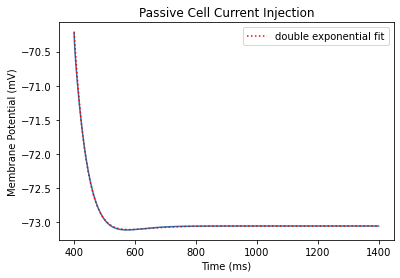

In [4]:
if sim.method == 'exp2':
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot=False)
    t_idx = slice(sim.index_v_rest, sim.index_v_final + 1)
    plt.figure()
    plt.plot(X[t_idx], Y[t_idx])
    plt.plot(*sim.double_exponential_fit(), 'r:', label='double exponential fit')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
else:
    X, Y = run_and_plot(sim, title, xlabel, ylabel)

#### Current Injection

In [5]:
sim = CurrentClamp(Cell, post_init_function=post_init_function,
                   inj_amp=200., inj_delay=400., inj_dur=1000., tstop=1700.)
title = 'Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[1].soma[0](0.5)
Recording: CP_Cell[1].soma[0](0.5)._ref_v


Current clamp simulation running...


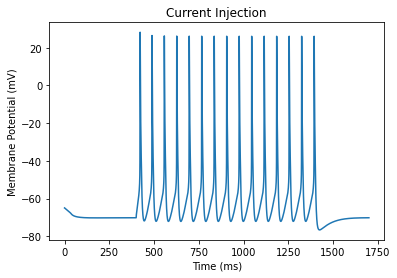

In [6]:
X, Y = run_and_plot(sim, title, xlabel, ylabel)

#### F-I Curve

In [7]:
sim = FI(Cell, post_init_function=post_init_function, i_start=0., i_stop=1000., i_increment=50., tstart=400.)
title = 'FI Curve'
xlabel = 'Injection (nA)'
ylabel = '# Spikes'

Injection location: CP_Cell[21].soma[0](0.5)
Recording: CP_Cell[21].soma[0](0.5)._ref_v


Running simulations for FI curve...

Results
Injection (nA): 0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95
Number of spikes: 0, 1, 10, 13, 15, 16, 18, 19, 20, 20, 21, 21, 22, 23, 23, 24, 25, 26, 26, 27



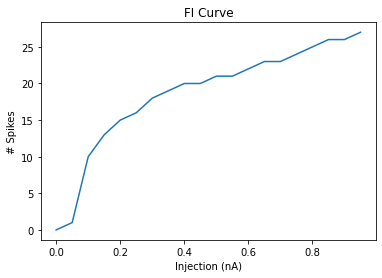

In [8]:
X, Y = run_and_plot(sim, title, xlabel, ylabel)